# 🧪 Lab 4: Decision Trees and Random Forests


**Course**: COMP3037 Introduction to AI    
**Instructor**: Ross Bigelow    
**Objective**: Learn how to build interpretable models using decision trees and improve performance with random forests.

In this lab, you'll predict whether a person is at risk of heart disease based on health survey data. We'll use decision trees to understand how features influence predictions, and random forests to improve accuracy.

You'll learn to:
- Train and visualize decision trees
- Understand overfitting and tree depth
- Use random forests for ensemble learning
- Evaluate models using accuracy and confusion matrices

## 🌲 What Is a Random Forest?

A **Random Forest** is an ensemble learning method that builds multiple decision trees and combines their outputs to improve accuracy and reduce overfitting. It’s used for both classification and regression tasks.

---

### 🧪 How It Works

1. **Bootstrap Sampling**: Each tree is trained on a random subset of the data (with replacement).
2. **Feature Randomness**: At each split, only a random subset of features is considered.
3. **Aggregation**:
   - **Classification**: Majority vote across trees
   - **Regression**: Average prediction across trees

This randomness makes the forest more robust and less prone to overfitting than a single decision tree.

---

### 📊 Visual Summary

| Component         | Description                                      |
|------------------|--------------------------------------------------|
| Trees            | Multiple decision trees trained independently    |
| Data Sampling     | Random subsets of training data per tree         |
| Feature Sampling  | Random subset of features per split              |
| Final Prediction  | Aggregated output from all trees                 |

---

### ✅ Advantages

- High accuracy and generalization
- Handles large datasets and high-dimensional spaces
- Resistant to overfitting
- Works well with missing data and categorical variables

---

### ⚠️ Limitations

- Less interpretable than a single decision tree
- Slower to train and predict with many trees
- Can be memory-intensive

---

### 📈 Use Cases

- Fraud detection
- Medical diagnosis
- Customer churn prediction
- Crop yield forecasting
- Loan approval scoring

In [2]:
# 📦 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 📥 Step 2: Load and explore the dataset
We'll simulate a dataset inspired by the Canadian Community Health Survey (CCHS), including features like age, smoking status, physical activity, and BMI.

In [20]:
# Simulate dataset
np.random.seed()
n = 1000
df = pd.DataFrame({
    'Age': np.random.randint(30, 80, size=n),
    'BMI': np.round(np.random.normal(27, 5, size=n), 1),
    'Smoker': np.random.choice(['Yes', 'No'], size=n, p=[0.3, 0.7]),
    'Physical_Activity': np.random.choice(['Low', 'Moderate', 'High'], size=n),
    'Has_Heart_Disease': np.random.choice([0, 1], size=n, p=[0.75, 0.25])
})

df.head()

,Age,BMI,Smoker,Physical_Activity,Has_Heart_Disease
0,42,27.5,No,Low,1
1,45,35.8,No,High,0
2,31,31.7,No,High,0
3,73,37.1,No,High,1
4,33,28.6,No,Low,0


## 🧹 Step 3: Preprocess the data
We'll convert categorical variables into numeric format using one-hot encoding and split the data into training and test sets.

In [22]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Smoker', 'Physical_Activity'], drop_first=True)

# Define features and target
X = df_encoded.drop('Has_Heart_Disease', axis=1)
y = df_encoded['Has_Heart_Disease']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()
# y_train.head()
# X_train.describe()

,Age,BMI,Smoker_Yes,Physical_Activity_Low,Physical_Activity_Moderate
29,38,23.1,False,True,False
535,46,32.6,True,False,True
695,48,34.6,True,True,False
557,33,20.3,False,False,False
836,33,32.8,False,False,True


## 🌳 Step 4: Train a Decision Tree Classifier
We'll start with a simple decision tree and visualize its structure to understand how it makes decisions.

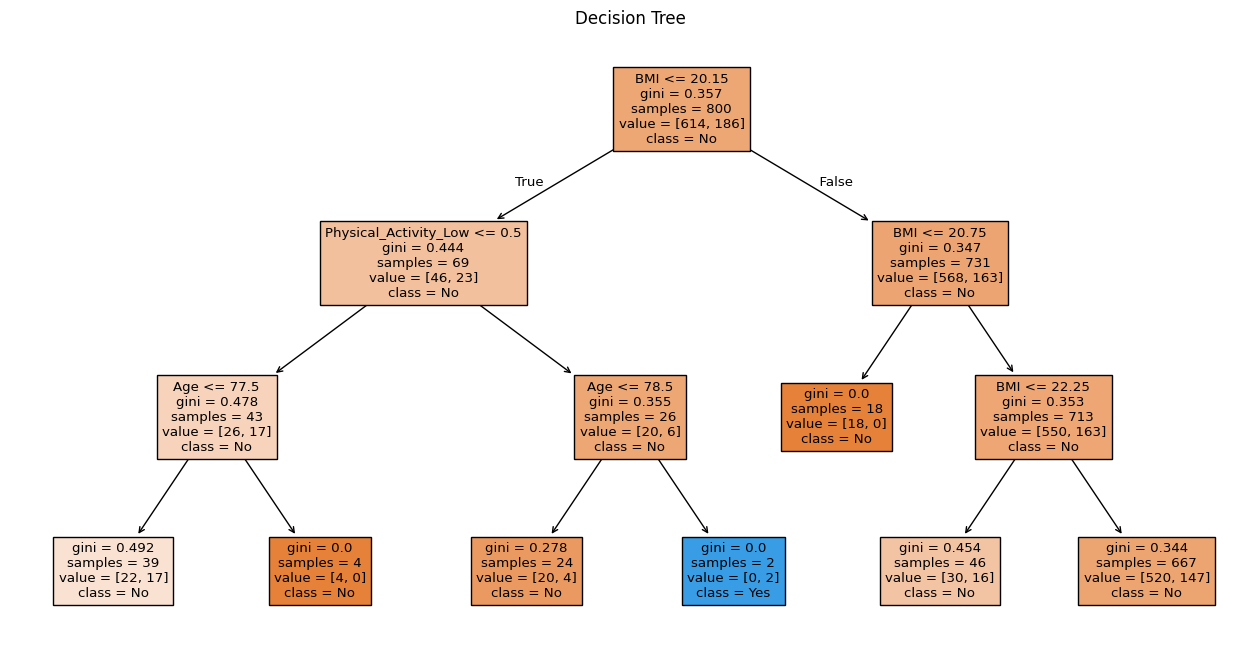

In [25]:
# Train decision tree
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Visualize tree
plt.figure(figsize=(16, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree")
plt.show()

## 📊 Step 5: Evaluate Decision Tree
We'll check accuracy and view the confusion matrix to understand performance.

Decision Tree Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.97      0.83       145
           1       0.43      0.05      0.10        55

    accuracy                           0.72       200
   macro avg       0.58      0.51      0.47       200
weighted avg       0.65      0.72      0.63       200



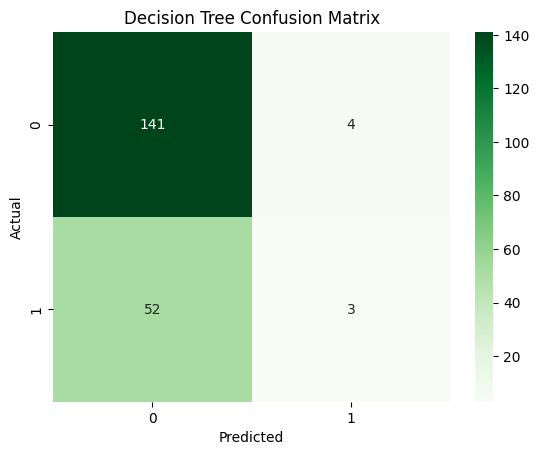

In [12]:
# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 🌲 Step 6: Train a Random Forest Classifier
Random forests combine multiple decision trees to reduce overfitting and improve accuracy.

Random Forest Accuracy: 0.735

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       162
           1       0.20      0.13      0.16        38

    accuracy                           0.73       200
   macro avg       0.51      0.50      0.50       200
weighted avg       0.70      0.73      0.71       200



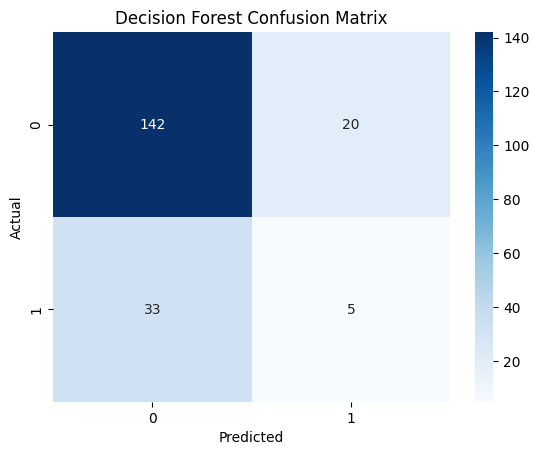

In [28]:
# Train random forest
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_forest = forest_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test, y_pred_forest))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 📈 Step 7: Feature Importance
Random forests can tell us which features are most important for prediction.

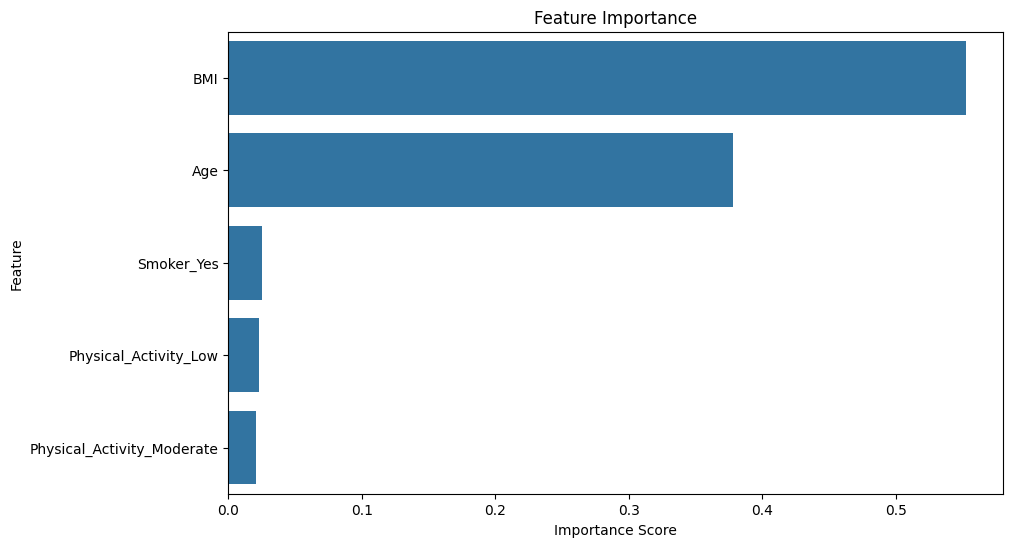

In [29]:
# Plot feature importance
importances = forest_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

## 📝 Reflection Questions

1. What are the advantages of decision trees compared to logistic regression?
2. How does random forest reduce overfitting?
3. Which features were most important for predicting heart disease?
4. How would you tune the model to improve performance?